# Preprocessing

Notebook ini merupakan bagian dari buku **Fundamental Machine Learning menggunakan Python** oleh **Fahmi Noor Fiqri**. Notebook ini berisi contoh kode untuk **Bab 6 - Preprocessing.**

In [1]:
# Mengimpor library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

## Membaca Data

In [2]:
# Membaca data dan menampilkan informasi data
df = pd.read_csv(r'../datasets/iris-missing.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  143 non-null    float64
 1   sepal-width   50 non-null     float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Menghapus Kolom

In [3]:
dropped = df.drop("sepal-width", axis=1)
dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  143 non-null    float64
 1   petal-length  150 non-null    float64
 2   petal-width   150 non-null    float64
 3   class         150 non-null    object 
dtypes: float64(3), object(1)
memory usage: 4.8+ KB


## Menghapus Data Kosong

In [4]:
def hitung_kosong(dataframe):
    print("Jumlah data kosong: ")
    print(dataframe.isnull().sum())
    print("Jumlah seluruh data: ")
    print(len(dataframe))
    print("\n")

hitung_kosong(df)
na_dropped_df = df.dropna()
hitung_kosong(na_dropped_df)

Jumlah data kosong: 
sepal-length      7
sepal-width     100
petal-length      0
petal-width       0
class             0
dtype: int64
Jumlah seluruh data: 
150


Jumlah data kosong: 
sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64
Jumlah seluruh data: 
47




## Menghapus Data Duplikat

In [5]:
non_duplicated_df = df.drop_duplicates()

print(df.loc[df.duplicated()])
print("\nJumlah data duplikat: ", len(df.duplicated()))
print("Jumlah data tanpa duplikat: ", len(non_duplicated_df))

sepal-length  sepal-width  petal-length  petal-width            class
30            4.8          NaN           1.6          0.2      Iris-setosa
34            4.9          NaN           1.5          0.1      Iris-setosa
37            4.9          NaN           1.5          0.1      Iris-setosa
42            4.4          NaN           1.3          0.2      Iris-setosa
49            5.0          NaN           1.4          0.2      Iris-setosa
89            5.5          NaN           4.0          1.3  Iris-versicolor
142           NaN          2.7           5.1          1.9   Iris-virginica

Jumlah data duplikat:  150
Jumlah data tanpa duplikat:  143


## Mengisi Data Kosong

In [6]:
# Menghilangkan data secara acak dari DataFrame
missing_rate = 0.25
n_samples = len(df)
n_missing_samples = int(n_samples * missing_rate)
data_to_impute = np.reshape(df["sepal-length"].values, (-1, 1))

rng = np.random.RandomState(42)
missing_samples = np.zeros(n_samples, dtype=np.bool)
missing_samples[:n_missing_samples] = True

rng.shuffle(missing_samples)
missing_features = rng.randint(0, 1, n_missing_samples)
data_to_impute[missing_samples, 0] = np.nan


### Simple Impute

In [7]:
imputer = SimpleImputer(strategy="median")
data_impute_simple = imputer.fit_transform(data_to_impute)

### Nearest Neighbor Impute

In [8]:
imputer = KNNImputer()
data_impute_knn = imputer.fit_transform(data_to_impute)

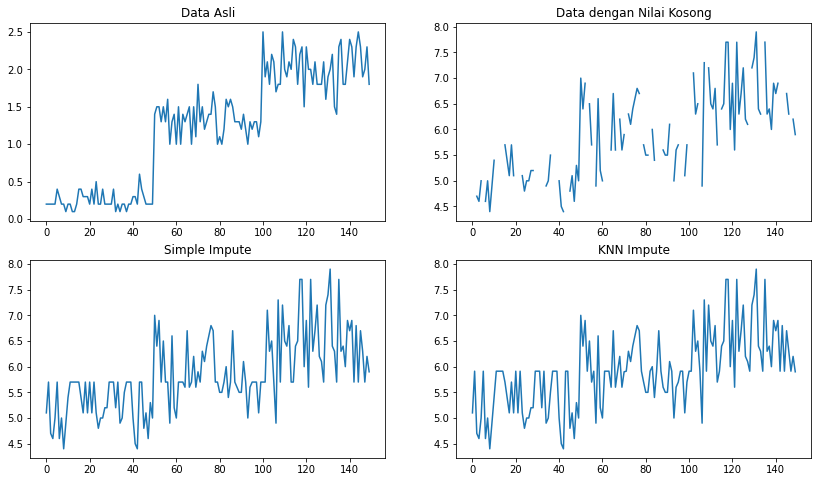

In [9]:
# Menampilkan grafik data hasil impute
plt.figure(figsize=(14,8))

ax1 = plt.subplot(2, 2, 1)
ax1.set_title("Data Asli")
plt.plot(df["petal-width"].values)

ax2 = plt.subplot(2, 2, 2)
ax2.set_title("Data dengan Nilai Kosong")
plt.plot(data_to_impute)

ax3 = plt.subplot(2, 2, 3)
ax3.set_title("Simple Impute")
plt.plot(data_impute_simple)

ax4 = plt.subplot(2, 2, 4)
ax4.set_title("KNN Impute")
plt.plot(data_impute_knn)

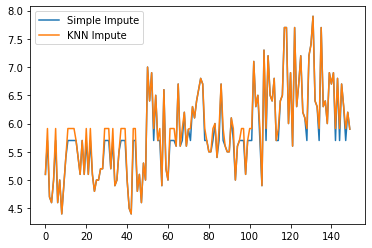

In [10]:
# Menampilkan grafik impute antara simple dan KNN
plt.figure()
plt.plot(data_impute_simple, label="Simple Impute")
plt.plot(data_impute_knn, label="KNN Impute")
plt.legend()

## Resampling Data

In [11]:
# Menghapus kelas secara acak
rng = np.random.RandomState(42)
df_imbalanced = df[["petal-width", "class"]]
df_imbalanced = df[df["class"] != "Iris-virginica"]
drop_indices = rng.choice(df_imbalanced.index, 20, replace=False)
df_imbalanced = df_imbalanced.drop(drop_indices)

df_imbalanced["class"].value_counts()

Iris-versicolor    42
Iris-setosa        38
Name: class, dtype: int64

In [12]:
# Upsampling
df_majority = df_imbalanced[df_imbalanced["class"]=="Iris-versicolor"]
df_minority = df_imbalanced[df_imbalanced["class"]=="Iris-setosa"]
 
df_resampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)
df_upsampled = pd.concat([df_majority, df_resampled])
 
df_upsampled["class"].value_counts()

Iris-versicolor    42
Iris-setosa        42
Name: class, dtype: int64

In [13]:
# Downsampling
df_majority = df_imbalanced[df_imbalanced["class"]=="Iris-versicolor"]
df_minority = df_imbalanced[df_imbalanced["class"]=="Iris-setosa"]
 
df_resampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)
df_downsampled = pd.concat([df_resampled, df_minority])
 
df_downsampled["class"].value_counts()

Iris-versicolor    38
Iris-setosa        38
Name: class, dtype: int64

## Menskalakan/Standarisasi Data

In [14]:
scaler = StandardScaler()

data_to_scale = np.reshape(df["petal-length"].values, (-1, 1)) # mengubah dimensi data
data_standar = scaler.fit_transform(data_to_scale)

print("Sebelum distandarisasi:")
print(np.reshape(data_to_scale[0:5], (1, -1)).ravel())
print("Setelah distandarisasi:")
print(np.reshape(data_standar[0:5], (1, -1)).ravel())

Sebelum distandarisasi:
[1.4 1.4 1.3 1.5 1.4]
Setelah distandarisasi:
[-1.3412724  -1.3412724  -1.39813811 -1.2844067  -1.3412724 ]


## Transformasi Data pada DataFrame

In [15]:
# Menerapkan fungsi logaritmik pada kolom DataFrame
df["petal-length-log"] = df["petal-length"].apply(lambda x: np.log(x))
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class,petal-length-log
0,5.1,NaN,1.4,0.2,Iris-setosa,0.336472
1,NaN,NaN,1.4,0.2,Iris-setosa,0.336472
2,4.7,NaN,1.3,0.2,Iris-setosa,0.262364
3,4.6,NaN,1.5,0.2,Iris-setosa,0.405465
4,5.0,NaN,1.4,0.2,Iris-setosa,0.336472


## Encoding Data Kategorik

In [16]:
# Memisahkan features dan label
X = df.iloc[:, :-2].values
y = df.iloc[:, 4].values

### Label Encoding

In [17]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
label_mapping

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

### One-Hot Encoding

In [18]:
encoder = OneHotEncoder()

y_reshape = np.reshape(y, (-1, 1))
y_test = np.reshape(y_reshape[0], (-1, 1))
data_encoded = encoder.fit_transform(y_reshape)

print(encoder.get_feature_names())
print(y_test)
print(encoder.transform(y_test).toarray())

['x0_Iris-setosa' 'x0_Iris-versicolor' 'x0_Iris-virginica']
[['Iris-setosa']]
[[1. 0. 0.]]


## Membagi Data Latih dan Uji

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)

print("Banyaknya data latih: ", len(X_train))
print("Banyaknya data uji: ", len(X_test))

Banyaknya data latih:  120
Banyaknya data uji:  30
